<a href="https://colab.research.google.com/github/rahulatrkm/Dog-Breed-Classifier/blob/master/dog_breed_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!rm -r sample_data

In [0]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip

--2020-01-11 13:59:50--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.116.152
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.116.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  67.2MB/s    in 15s     

2020-01-11 14:00:05 (70.8 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

--2020-01-11 14:00:10--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.24.145
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.24.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509 (188M) [application/zip]
Saving to: ‘lfw.zip’

lfw.zip             100%[================

In [0]:
%%capture
!unzip dogImages.zip
!unzip lfw.zip

In [0]:
!rm -r dogImages.zip
!rm -r lfw.zip
!rm -r __MACOSX

In [0]:
!ls lfw

Aaron_Eckhart			 Joshua_Harapko
Aaron_Guiel			 Joshua_Perper
Aaron_Patterson			 Joxel_Garcia
Aaron_Peirsol			 Joy_Bryant
Aaron_Pena			 Joy_Lee_Sadler
Aaron_Sorkin			 JP_Suarez
Aaron_Tippin			 JT_Snow
Abba_Eban			 Juan_Antonio_Samaranch
Abbas_Kiarostami		 Juan_Carlos
Abdel_Aziz_Al-Hakim		 Juan_Carlos_Ferrero
Abdel_Madi_Shabneh		 Juan_Carlos_Morales
Abdel_Nasser_Assidi		 Juan_Carlos_Ortega
Abdoulaye_Wade			 Juanes
Abdulaziz_Kamilov		 Juan_Fernandez
Abdullah			 Juan_Francisco_Palencia
Abdullah_Ahmad_Badawi		 Juan_Ignacio_Chela
Abdullah_al-Attiyah		 Juan_Jose_Lucas
Abdullah_Gul			 Juan_Manuel_Marquez
Abdullah_Nasseef		 Juan_Pablo_Montoya
Abdullatif_Sener		 Juan_Roman_Carrasco
Abdul_Majeed_Shobokshi		 Juan_Roman_Riquelme
Abdul_Rahman			 Juan_Sanchez
Abel_Aguilar			 Juan_Valencia_Osorio
Abel_Pacheco			 Judd_Davies
Abid_Hamid_Mahmud_Al-Tikriti	 Jude_Law
Abner_Martinez			 Judi_Dench
Abraham_Foxman			 Judi_Patton
Aby_Har-Even			 Judith_Nathan
Adam_Ant			 Judy_Dean
Adam_Freier			 Judy_Genshaft
A

In [0]:
!ls dogImages/train/

001.Affenpinscher		    068.Flat-coated_retriever
002.Afghan_hound		    069.French_bulldog
003.Airedale_terrier		    070.German_pinscher
004.Akita			    071.German_shepherd_dog
005.Alaskan_malamute		    072.German_shorthaired_pointer
006.American_eskimo_dog		    073.German_wirehaired_pointer
007.American_foxhound		    074.Giant_schnauzer
008.American_staffordshire_terrier  075.Glen_of_imaal_terrier
009.American_water_spaniel	    076.Golden_retriever
010.Anatolian_shepherd_dog	    077.Gordon_setter
011.Australian_cattle_dog	    078.Great_dane
012.Australian_shepherd		    079.Great_pyrenees
013.Australian_terrier		    080.Greater_swiss_mountain_dog
014.Basenji			    081.Greyhound
015.Basset_hound		    082.Havanese
016.Beagle			    083.Ibizan_hound
017.Bearded_collie		    084.Icelandic_sheepdog
018.Beauceron			    085.Irish_red_and_white_setter
019.Bedlington_terrier		    086.Irish_setter
020.Belgian_malinois		    087.Irish_terrier
021.Belgian_sheepdog		    088.Irish_water_spaniel
022.Belg

In [0]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


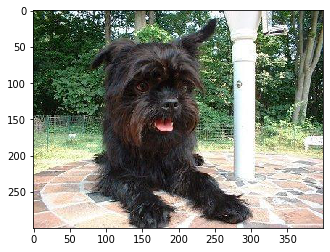

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')
plt.imshow(img)

import torch
import torchvision.models as models

# check if CUDA is available
use_cuda = torch.cuda.is_available()

In [0]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True

batch_size = 50
num_workers = 0
data_dir = 'dogImages'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# training data
train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),
    normalize
])
train_folder = datasets.ImageFolder(train_dir, transform = train_transform)
train_data = torch.utils.data.DataLoader(train_folder, shuffle = True, batch_size = batch_size, num_workers = num_workers)

# validation data
valid_transform = transforms.Compose([transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    normalize
])
valid_folder = datasets.ImageFolder(valid_dir, transform = valid_transform)
valid_data = torch.utils.data.DataLoader(valid_folder, shuffle = True, batch_size = batch_size, num_workers = num_workers)

# test data
test_transform = transforms.Compose([transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    normalize
])
test_folder = datasets.ImageFolder(test_dir, transform = test_transform)
test_data = torch.utils.data.DataLoader(test_folder, shuffle = True, batch_size = batch_size, num_workers = num_workers)


In [0]:
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # convolutional layer (sees 224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 5, padding=2)
        # convolutional layer (sees 112x112x16 image tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 56x56x32 image tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # convolutional layer (sees 28x28x64 image tensor)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        # convolutional layer (sees 14x14x128 image tensor)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        
        ## fully connected layer
        self.fc1 = nn.Linear(256*7*7, 5000)
        self.fc2 = nn.Linear(5000, 133)
        
        ## pool
        self.pool = nn.MaxPool2d(2,2)
        
        # dropout layer
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        # flatten image input
        x = x.view(-1, 256 * 7 * 7)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
summary(model_scratch, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]           1,216
         MaxPool2d-2         [-1, 16, 112, 112]               0
            Conv2d-3         [-1, 32, 112, 112]           4,640
         MaxPool2d-4           [-1, 32, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          18,496
         MaxPool2d-6           [-1, 64, 28, 28]               0
            Conv2d-7          [-1, 128, 28, 28]          73,856
         MaxPool2d-8          [-1, 128, 14, 14]               0
            Conv2d-9          [-1, 256, 14, 14]         295,168
        MaxPool2d-10            [-1, 256, 7, 7]               0
          Dropout-11                [-1, 12544]               0
           Linear-12                 [-1, 5000]      62,725,000
          Dropout-13                 [-1, 5000]               0
           Linear-14                  [

In [0]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.05)

In [0]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss  
    # return trained model
    return model


loaders_scratch = {
    'train': train_data,
    'valid': valid_data,
    'test': test_data
}

# train the model - 110 epochs
model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 2.291541 	Validation Loss: 3.947657
Validation loss decreased (inf --> 3.947657).  Saving model ...
Epoch: 2 	Training Loss: 2.249187 	Validation Loss: 3.898182
Validation loss decreased (3.947657 --> 3.898182).  Saving model ...
Epoch: 3 	Training Loss: 2.209766 	Validation Loss: 4.016797
Epoch: 4 	Training Loss: 2.239868 	Validation Loss: 4.128229
Epoch: 5 	Training Loss: 2.155868 	Validation Loss: 4.675460
Epoch: 6 	Training Loss: 2.151872 	Validation Loss: 3.898339
Epoch: 7 	Training Loss: 2.164120 	Validation Loss: 3.930942
Epoch: 8 	Training Loss: 2.090613 	Validation Loss: 3.973188
Epoch: 9 	Training Loss: 2.093838 	Validation Loss: 3.845053
Validation loss decreased (3.898182 --> 3.845053).  Saving model ...
Epoch: 10 	Training Loss: 2.066380 	Validation Loss: 4.189881


<All keys matched successfully>

In [0]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
      
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.655875


Test Accuracy: 24% (204/836)


In [0]:
loaders_transfer = loaders_scratch

In [0]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)
    
# freezing the parameters
for param in model_transfer.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 52.5MB/s]


In [0]:
# change the last layer from
model_transfer.fc = nn.Linear(2048, 133, bias=True)

In [0]:
if use_cuda:
    model_transfer = model_transfer.cuda()

In [0]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001)

In [0]:
# train the model
n_epochs = 100
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

In [27]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

In [28]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.384519


Test Accuracy: 76% (640/836)
